## Demo for up sampled PSF modelling from simulated data

#### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
import dill
main_data_dir = io.param.load('datapath.yaml').main_data_dir
try:
    gpus = tf.config.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print('Running on GPU')
except:
    print('Running on CPU')

Running on GPU


#### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_user')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine('config_base',psftype='voxel',channeltype='1ch',sysfile='Ast_M3_Li')


#### Edit user defined parameters

In [3]:
L.param.datapath = main_data_dir+'/Simulated_data/'
L.param.savename = L.param.datapath+'Sim_up_psfmodel_bin_3'
L.param.FOV.z_step = 1  
L.param.pixel_size.z = 0.05 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.max_bead_number = 200 
L.param.roi.bead_radius = 0.025
L.param.batch_size = 30 # lower this number if out of memory
L.param.pixel_size.x = 0.330 
L.param.pixel_size.y = 0.330
L.param.option.model.bin = 3 # The bin factor refers to the ratio between the pixel size of the data and the pixel size of the upsampled PSF and must be an integer.
with open(L.param.datapath+ 'simulated_data.pkl', 'rb') as f_d: # load simulated data
    dataobj=dill.load(f_d)

#### Start learning

In [4]:
L.getpsfclass()
for k in range(0,1): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

3/6: learning: 248/250 [01:27s]  2.84it/s, current loss: 0.50029, total time: 87.26s
c:\users\dell\desktop\up sampled psf-main\psflearning\learning\psfs\PSFVolumeBased_file.py:166: ComplexWarning: Casting complex values to real discards the imaginary part
  I_model = I_model.astype(np.float32)
4/6: calculating spline coefficients: 1/1 [00:06s]  6.91s/it total time: 94.17s
4/6: calculating spline coefficients: 1/1 [00:06s]  6.93s/it total time: 94.17s

5/6: localization: 1/3 [00:00s]  1.95it/s total time: 94.69s
5/6: localization: 2/3 [00:00s]  2.43it/s total time: 95.03s
5/6: localization: 3/3 [00:01s]  2.67it/s total time: 95.29s


outlier id: [ 67  86 154 247 263]
rois shape channel : (295, 39, 17, 17)


3/6: learning: 294/? [01:35s]  3.06it/s, current loss: 0.49361, total time: 191.28s  
4/6: calculating spline coefficients: 1/1 [00:06s]  6.89s/it total time: 198.17s
4/6: calculating spline coefficients: 1/1 [00:06s]  6.91s/it total time: 198.17s

5/6: localization: 1/3 [00:00s]  1.98it/s total time: 198.68s
5/6: localization: 2/3 [00:00s]  2.47it/s total time: 199.01s
5/6: localization: 3/3 [00:01s]  2.70it/s total time: 199.29s
6/6: saving results: [00:14s] total time: 214.10s


#### Show results

In [5]:
f,p = io.h5.load(resfile) # load result file

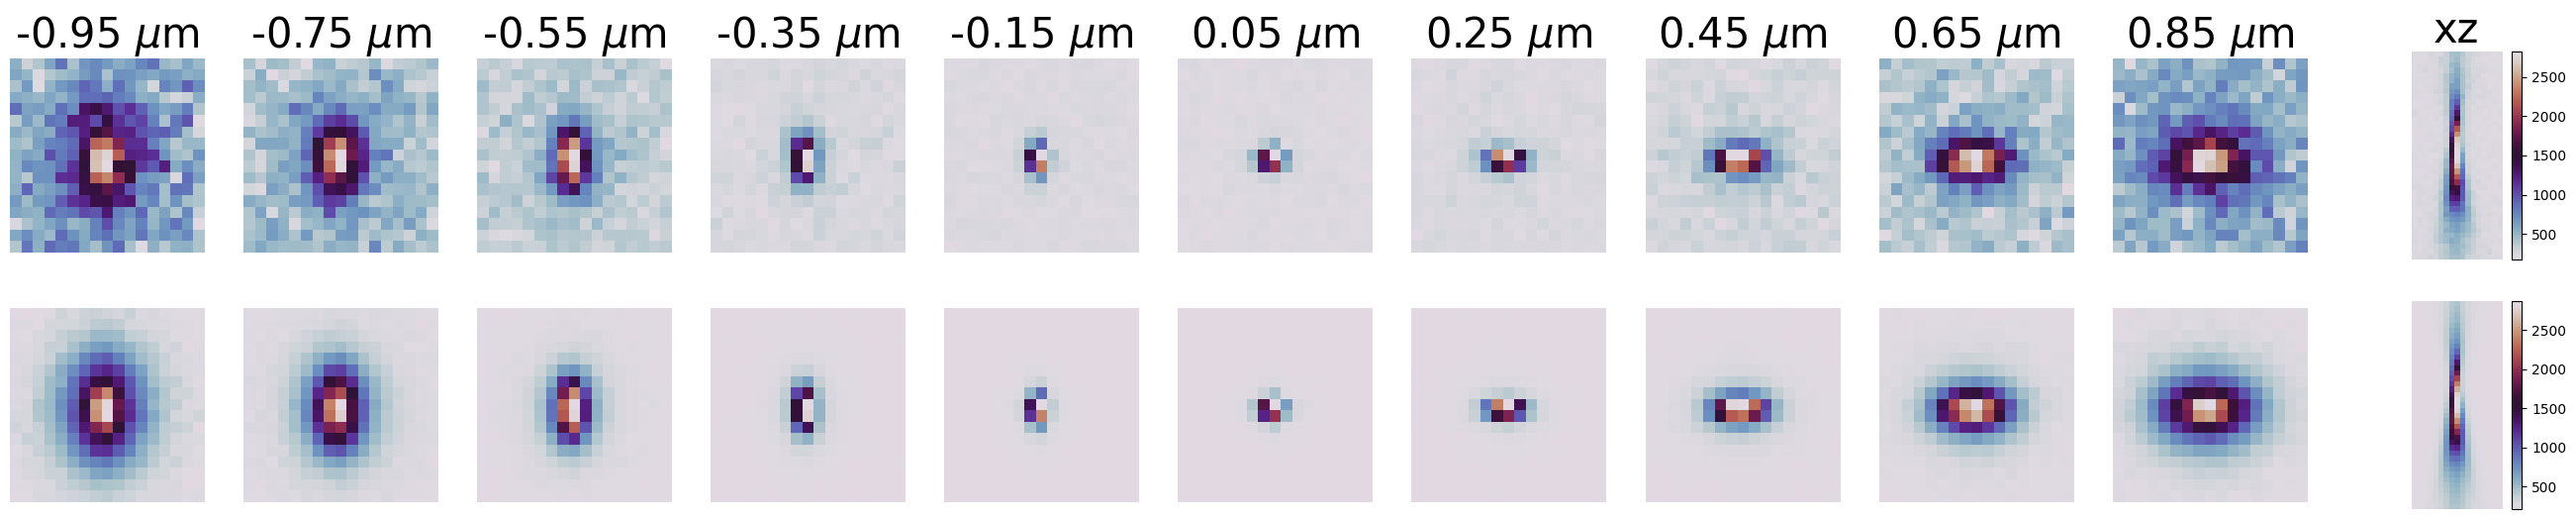

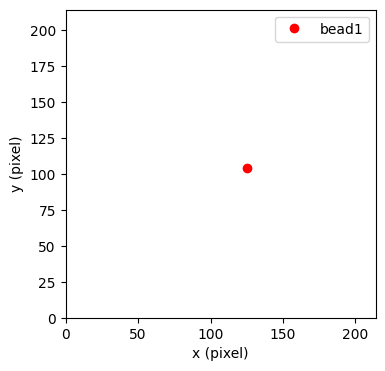

In [6]:
showpsfvsdata(f,p,index=1)

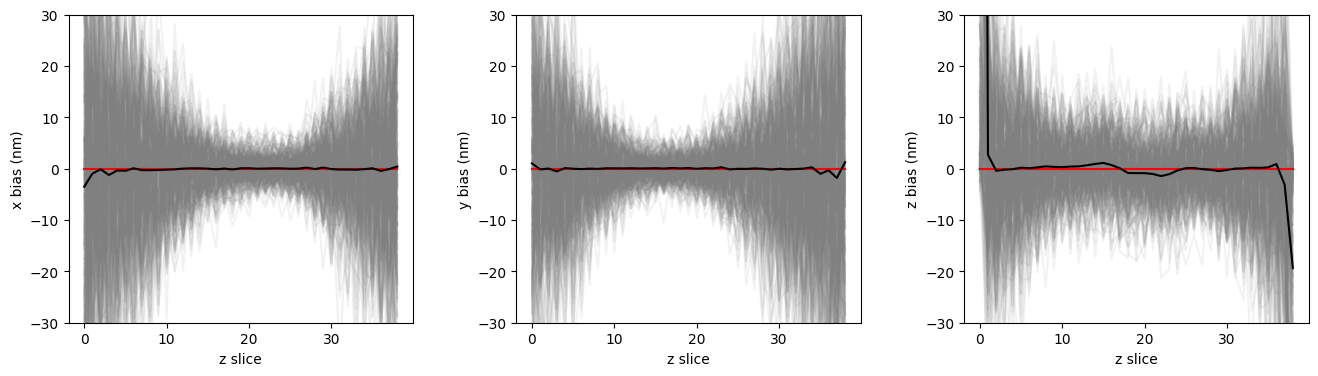

In [7]:
showlocalization(f,p)

#### Optional plots

In [8]:
try:
    showzernike(f,p)
except:
    try: 
        showpupil(f,p)
    except:
        print('no pupil')

no pupil


<Figure size 1000x800 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

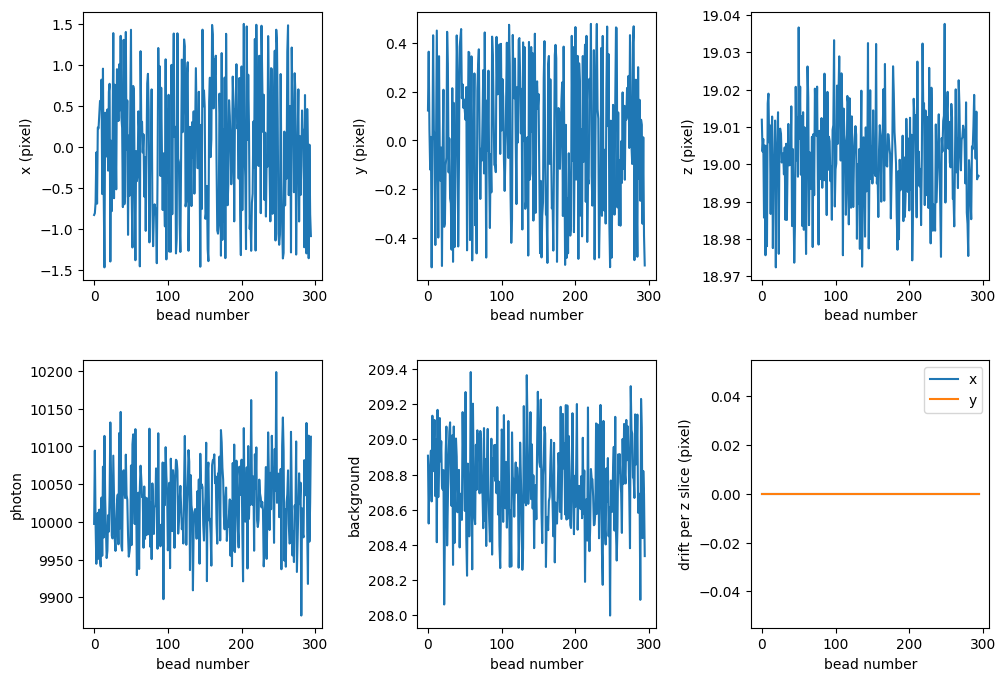

In [9]:
showlearnedparam(f,p)

#### Ouput parameters

In [10]:
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc']
 res:
     ['I_model', 'I_model_bead', 'I_model_reverse', 'bg', 'cor', 'cor_all', 'drift_rate', 'intensity', 'offset', 'pos']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']
